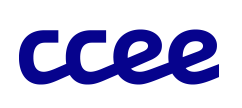

# Momento Capacita - Portal de Dados Abertos da CCEE

Paulo Franco - 13/07/2023 

O objetivo dessa apresentação e conteúdo é abordar brevemente alguns conceitos e demonstrar alguns recursos para promover o melhor aproveitamento e potencialidades de uso portal de dados abertos da CCEE para os agentes do mercado de energia elétrica e interessados. 

In [4]:
!pip install requests
!pip install mercury 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ggomessa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ggomessa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB 435.7 kB/s eta 0:00:06
      --------------------------------------- 0.1/2.6 MB 550.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/2.6 MB 1.5 MB/s eta 0:00:02
     ------ --------------------------------- 0.4/2.6 MB 1.8 MB/s eta 0:00:02
     --------- ------------------------------ 0.6/2.6 MB 2.4 MB/s eta 0:00:01
     ----------------- ---------------------- 1.2/2.6 MB 3.7 MB/s eta 0:00:01
     ----------------------------- ---------- 1.9/2.6 MB 5.3 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 6.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies:

In [5]:
import requests as req
import json
import mercury as mr

In [6]:
host = 'https://dadosabertos.ccee.org.br'
api = '/api/3/action/'

## Metadados

Metadados, ou Metainformação, são dados sobre dados. Pode ser inteligível por um computador, mas acima de tudo, nossa principal abordagem por aqui é que seja inteligível por humanos. Os metadados facilitam o entendimento dos relacionamentos e a utilidade das informações, dos dados, quer seja sobre o conhecimento do processo de produção ou formato, quer seja sobre o conhecimento do significado do dado, o que ele representa, ou a que contexto ou conceito está associado. Dados descritivos de um conjunto de dados, como autor, data de criação, tipo de conteúdo, forma, frequência de produção e outras informações são metadados correspondentes ao processo, enquando as descrições sobre o conjunto de dados, sobre os campos dos conjuntos de dados, tags e grupos são metadados que trazem significados e conceitos para aproveitamento da geração de valor com os dados.

In [7]:
url = host+api+"package_show?id=contrato_montante_periodo"
url

'https://dadosabertos.ccee.org.br/api/3/action/package_show?id=contrato_montante_periodo'

In [8]:
mr.JSON(req.get(url).json())

SSLError: HTTPSConnectionPool(host='dadosabertos.ccee.org.br', port=443): Max retries exceeded with url: /api/3/action/package_show?id=contrato_montante_periodo (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

In [9]:
mr.JSON(req.get(host+api+"tag_list").json())

SSLError: HTTPSConnectionPool(host='dadosabertos.ccee.org.br', port=443): Max retries exceeded with url: /api/3/action/tag_list (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

## API

API acrônimo de Application Programming Interface (Interface de Programação de Aplicação). Vamos entender como um conjunto de serviços disponíveis (ou disponibilizados) por uma aplicação para que outros softwares ou aplicações usufruam. No nosso contexto vamos abordar o provimento de _dados_ e _metadados_ através das **APIs dos dadosabertos.ccee.org.br**.

Comunicação com o portal. O portal de dados abertos está em operação?

In [10]:
host+api+"site_read"

'https://dadosabertos.ccee.org.br/api/3/action/site_read'

In [11]:
is_op = req.get(host+api+"site_read").json()
mr.JSON(is_op)

SSLError: HTTPSConnectionPool(host='dadosabertos.ccee.org.br', port=443): Max retries exceeded with url: /api/3/action/site_read (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

## Padrão REST

REST é a sigla em inglês para "Representational State Transfer", que em português significa Transferência de Estado Representacional. É o padrão chave da arquitetura Web, protocolo HTTP (Hypertext Transfer Protocol) de comunicação utilizado para sistemas de informação de hipermídia, distribuídos e colaborativos.
Na arquitetura Web realizamos solicitações "requests" e recebemos respostas a essas solicitações "responses". A cada request, o referido protocolo HTTP, requer a informação de um método ou verbo que define a requisição, como por exemplo "GET", "POST", "PUT", "DELETE" dentre outros. As respostas também são codificadas pelo protocolo para informar o estado correspondente a resposta, por exemplo "200" significa que a requisição foi bem sucedida e o retorno "está conforme o esperado" (as aspas aqui é para destacar uma licença poética, pois nem sempre o retorno realmente atende a expectativa).

In [12]:
req.get(host+api+"site_read")

SSLError: HTTPSConnectionPool(host='dadosabertos.ccee.org.br', port=443): Max retries exceeded with url: /api/3/action/site_read (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

No exemplo acima, utilizaremos o método GET ("obter, pegar") e apresenta o código (código HTTP)

### Filtros

Elementos utilizados para restringir ou orientar os resultados a serem respondidos (responses).

No exemplo abaixo solicitei que retorne a quantidade de registros (observações), além dos próprios registros. Note que no resultado será apresentado um objeto "total" com uma quantidade correspondente ao total de observações do recurso (dados).

In [9]:
mr.JSON(req.get(host+api+"datastore_search?resource_id=76e1a4ba-ee31-4add-b85b-48c77263610a&include_total=true").json())

No exemplo abaixo a chamada dispensa, através do filtro "include_total=false", a contagem citada no exemplo supra. 

In [10]:
mr.JSON(req.get(host+api+"datastore_search?resource_id=76e1a4ba-ee31-4add-b85b-48c77263610a&include_total=false").json())

### Paginação

Nessa arquitetura, com esse protocolo, a consistência dos dados trafegados é muito importante e sempre que buscamos consistência consumimos mais recursos e aumentamos a latência. Para evitarmos os efeitos ocasionados por essa latência (lentidão) costumamos dividir a aquisição de recursos em partes (páginas), para que em um conjunto de requests possamos obter todos os dados pelos quais nos interessamos. 

Para tanto a API de dados do portal de dados abertos conta com as opção de filtros e "limit" e "offset". O "limit" restringe a quantidade de resultados enquanto o "offset" indica a partir de qual registro queremos a resposta. 

In [11]:
mr.JSON(req.get(host+api+"datastore_search?resource_id=76e1a4ba-ee31-4add-b85b-48c77263610a&limit=5&offset=2&include_total=True").json())

## Padrão JSON

Um acrônimo de JavaScript Object Notation comumente usando em serviços REST; leve, compacto, fácil de interpretar e implementar. Possui uma sintaxe simples com alguns caracteres reservados para compor arranjos de objetos e listas, com os quais podemos perceber e estruturar diversos arranjos de dados.

In [12]:
print(req.get(host+api+"organization_list").json())

{'help': 'https://dadosabertos.ccee.org.br/api/3/action/help_show?name=organization_list', 'success': True, 'result': ['infomercado']}


In [13]:
#identado
print(json.dumps(req.get(host+api+"organization_list").json(), indent=4))

{
    "help": "https://dadosabertos.ccee.org.br/api/3/action/help_show?name=organization_list",
    "success": true,
    "result": [
        "infomercado"
    ]
}


In [14]:
#expansível
mr.JSON(req.get(host+api+"organization_list").json())

In [15]:
print(json.dumps(req.get(host+api+"package_list").json(), indent=4))

{
    "help": "https://dadosabertos.ccee.org.br/api/3/action/help_show?name=package_list",
    "success": true,
    "result": [
        "ccen_balanco_energetico_mensal",
        "consumo_classe_agente",
        "consumo_horario_submercado",
        "consumo_mensal_ambiente_comercializacao",
        "contrato_montante_mensal_cbr",
        "contrato_montante_mensal_tipo",
        "contrato_montante_periodo",
        "contrato_montante_submercado_horario",
        "exposicao_financeira_mensal",
        "geracao_consolidada",
        "geracao_fonte_despacho",
        "geracao_horaria_fonte_submercado",
        "geracao_submercado",
        "mre_horario",
        "mre_mensal",
        "perda_rb_horario",
        "perda_rb_mes",
        "pld_horario_submercado",
        "sumario_be_horario_submercado",
        "sumario_mensal_compra_venda_submercado"
    ]
}


## Operações com as APIs de Dados do Portal de Dados Abertos da CCEE

Pela API os conjuntos de dados são "packages". Para obter uma lista completa de conjunto de dados use "**package_list**"

In [16]:
mr.JSON(req.get(host+api+"package_list").json())

* Organizações ora existentes no portal de dados abertos da CCEE

In [17]:
mr.JSON(req.get(host+api+"organization_list").json())

Para obter a lista com detalhes do conjunto de dados utilize a operação "**current_package_list_with_resources**" *(paginação recomendada)*

In [18]:
mr.JSON(req.get(host+api+"current_package_list_with_resources?limit=5&offset=0").json())

 + metadados de um conjunto de dados específicado "**package_show**"

In [19]:
mr.JSON(req.get(host+api+"package_show?id=contrato_montante_periodo").json())

### Busca de Conjunto de Dados

Podemos utilizar metadados para consultar os conjuntos de dados de interesse (data discovery).

Consultar com base no nome ou título do conjunto de dados **"package_autocomplete"**.

In [20]:
mr.JSON(req.get(host+api+"package_autocomplete?q='sumario'").json())

Use a operação **"tag_show"** parametrizando com o campo **"id"** a tag de interesse e o campo **"include_datasets"** para obter todos os conjuntos de dados que possuem associação com a tal tag.

In [21]:
mr.JSON(req.get(host+api+"tag_show?id=perdas&include_datasets=true").json())

Para a busca de conjunto de dados a opção mais versátil é operação **"package_search"**. Nessa opção a variedade de campos de consulta é deveras abrangente.

O parâmetro **"q"** é a consulta mais genérica possível. Avalia a existência dos termos em todos os campos e retorna o objeto caso encontre qualquer um dos termos informados.

In [22]:
mr.JSON(req.get(host+api+"package_search?q=consumo de energia elétrica cotas").json())

Com o parâmetro **"fq"** podemos identificar o campo cujos termos são objeto da consulta.

In [23]:
mr.JSON(req.get(host+api+"package_search?fq=notes:consumo de energia elétrica cotas").json())

In [24]:
mr.JSON(req.get(host+api+"package_search?fq=notes:MCP submercado").json())

#### Documentação

Em toda operação (cada requisição), na estrutura de retorno temos um campo **"help"**. O campo help retorna uma url com uma operação **"help_show"** e o parâmetro **"name"** que corresponde ao pacote ao qual queremos conhecer  

In [25]:
mr.Markdown(req.get("https://dadosabertos.ccee.org.br/api/3/action/help_show?name=package_search").json()['result'])


    Searches for packages satisfying a given search criteria.

    This action accepts solr search query parameters (details below), and
    returns a dictionary of results, including dictized datasets that match
    the search criteria, a search count and also facet information.

    **Solr Parameters:**

    For more in depth treatment of each paramter, please read the
    `Solr Documentation
    <https://lucene.apache.org/solr/guide/6_6/common-query-parameters.html>`_.

    This action accepts a *subset* of solr's search query parameters:


    :param q: the solr query.  Optional.  Default: ``"*:*"``
    :type q: string
    :param fq: any filter queries to apply.  Note: ``+site_id:{ckan_site_id}``
        is added to this string prior to the query being executed.
    :type fq: string
    :param fq_list: additional filter queries to apply.
    :type fq_list: list of strings
    :param sort: sorting of the search results.  Optional.  Default:
        ``'score desc, metadata_modified desc'``.  As per the solr
        documentation, this is a comma-separated string of field names and
        sort-orderings.
    :type sort: string
    :param rows: the maximum number of matching rows (datasets) to return.
        (optional, default: ``10``, upper limit: ``1000`` unless set in
        site's configuration ``ckan.search.rows_max``)
    :type rows: int
    :param start: the offset in the complete result for where the set of
        returned datasets should begin.
    :type start: int
    :param facet: whether to enable faceted results.  Default: ``True``.
    :type facet: string
    :param facet.mincount: the minimum counts for facet fields should be
        included in the results.
    :type facet.mincount: int
    :param facet.limit: the maximum number of values the facet fields return.
        A negative value means unlimited. This can be set instance-wide with
        the :ref:`search.facets.limit` config option. Default is 50.
    :type facet.limit: int
    :param facet.field: the fields to facet upon.  Default empty.  If empty,
        then the returned facet information is empty.
    :type facet.field: list of strings
    :param include_drafts: if ``True``, draft datasets will be included in the
        results. A user will only be returned their own draft datasets, and a
        sysadmin will be returned all draft datasets. Optional, the default is
        ``False``.
    :type include_drafts: bool
    :param include_deleted: if ``True``, deleted datasets will be included in the
        results (site configuration "ckan.search.remove_deleted_packages" must
        be set to False). Optional, the default is ``False``.
    :type include_deleted: bool
    :param include_private: if ``True``, private datasets will be included in
        the results. Only private datasets from the user's organizations will
        be returned and sysadmins will be returned all private datasets.
        Optional, the default is ``False``.
    :type include_private: bool
    :param use_default_schema: use default package schema instead of
        a custom schema defined with an IDatasetForm plugin (default: ``False``)
    :type use_default_schema: bool


    The following advanced Solr parameters are supported as well. Note that
    some of these are only available on particular Solr versions. See Solr's
    `dismax`_ and `edismax`_ documentation for further details on them:

    ``qf``, ``wt``, ``bf``, ``boost``, ``tie``, ``defType``, ``mm``


    .. _dismax: http://wiki.apache.org/solr/DisMaxQParserPlugin
    .. _edismax: http://wiki.apache.org/solr/ExtendedDisMax


    **Examples:**

    ``q=flood`` datasets containing the word `flood`, `floods` or `flooding`
    ``fq=tags:economy`` datasets with the tag `economy`
    ``facet.field=["tags"] facet.limit=10 rows=0`` top 10 tags

    **Results:**

    The result of this action is a dict with the following keys:

    :rtype: A dictionary with the following keys
    :param count: the number of results found.  Note, this is the total number
        of results found, not the total number of results returned (which is
        affected by limit and row parameters used in the input).
    :type count: int
    :param results: ordered list of datasets matching the query, where the
        ordering defined by the sort parameter used in the query.
    :type results: list of dictized datasets.
    :param facets: DEPRECATED.  Aggregated information about facet counts.
    :type facets: DEPRECATED dict
    :param search_facets: aggregated information about facet counts.  The outer
        dict is keyed by the facet field name (as used in the search query).
        Each entry of the outer dict is itself a dict, with a "title" key, and
        an "items" key.  The "items" key's value is a list of dicts, each with
        "count", "display_name" and "name" entries.  The display_name is a
        form of the name that can be used in titles.
    :type search_facets: nested dict of dicts.

    An example result: ::

     {'count': 2,
      'results': [ { <snip> }, { <snip> }],
      'search_facets': {u'tags': {'items': [{'count': 1,
                                             'display_name': u'tolstoy',
                                             'name': u'tolstoy'},
                                            {'count': 2,
                                             'display_name': u'russian',
                                             'name': u'russian'}
                                           ]
                                 }
                       }
     }

    **Limitations:**

    The full solr query language is not exposed, including.

    fl
        The parameter that controls which fields are returned in the solr
        query.
        fl can be  None or a list of result fields, such as
        ['id', 'extras_custom_field'].
        if fl = None, datasets are returned as a list of full dictionary.
    

### Busca Específica de Recursos

Quando a busca é ainda mais específica, sobre recursos, use **"resource_search"**, parametrizando o campo **"query"** com uma correspondência de chave:valor para obter os recursos que possuem atendam ao critério.  

In [26]:
mr.JSON(req.get(host+api+"resource_search?query=description:MWmed").json())

### Aos Dados

Para obter os dados da API do portal use **"datastore_search"** parametrizando o identificador do recurso no campo **"resource_id"**.

In [27]:
mr.JSON(req.get(host+api+'datastore_search?resource_id=sumario_be_horario_submercado_2023').json())

#### Filtro de Dados

Muitas ocasiões ou soluções não requerem todos dados disponíveis e portanto para filtrar os dados de interesse use uma parametrização no campo **"filters"** com o critério a ser atendido.

In [28]:
mr.JSON(req.get(host+api+'datastore_search?resource_id=sumario_be_horario_submercado_2023&filters={"SUBMERCADO":"SUDESTE"}').json())

Eventualmente o interesse é somente para algumas colunas, nesse caso acrescente o campo "*fields*" e preencha com a lista (separada por vírgula) dos campos a serem retornados

In [29]:
mr.JSON(req.get(host+api+'datastore_search?resource_id=sumario_be_horario_submercado_2023&fields=MES_REFERENCIA,RESULTADO_MCP&filters={"SUBMERCADO":"SUDESTE","PERIODO_COMERCIALIZACAO":600}').json())

#### Dinâmica de Paginação do Conjunto de Dados

Para exemplificar uma dinâmica de paginação em poucas linhas de código, explorando do resultado **"_links"**/**"next"** fornecido pela API. <br>
\* **importante:** esse é apenas simples exemplo "ilustrativo" e não deve ser usados como solução final, pois para tal, outros atributos como **total_was_estimated** e **total_estimation_threshold** devem ser considerados; consulte a documentação para mais detalhes.

In [30]:
req_next = req.get(host+api+'datastore_search?resource_id=sumario_be_horario_submercado_2023&offset=0&limit=500').json()
mr.JSON(req_next)
while (req_next['result']['offset'] + req_next['result']['limit']) < req_next['result']['total']:
    req_next= req.get(host+req_next['result']['_links']['next']).json()
    mr.JSON(req_next)
